In [336]:
# import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error


In [337]:
# load the data 
insurance_df = pd.read_csv("C:/Users/ArnabP/Downloads/insurance.csv")

In [338]:
# check the first 5 rows 
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [339]:
# chek the last 5 rows 
insurance_df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Text(0.5, 1.0, 'Disribution of Insurance Charges with Age and Region')

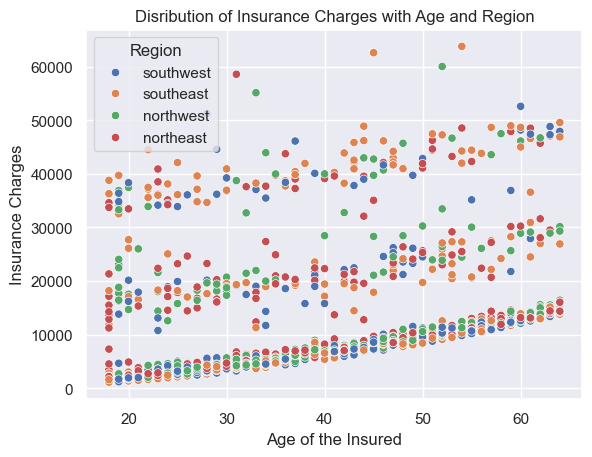

In [340]:
# Disribution of Insurance Charges with Age and Region
sns.scatterplot(x="age", y="charges", data=insurance_df, hue="region")
plt.legend(title="Region")
plt.xlabel("Age of the Insured")
plt.ylabel("Insurance Charges")
plt.title("Disribution of Insurance Charges with Age and Region")

Text(0.5, 1.0, 'Distribution of Insurance Charges with Smoker Status across Regions')

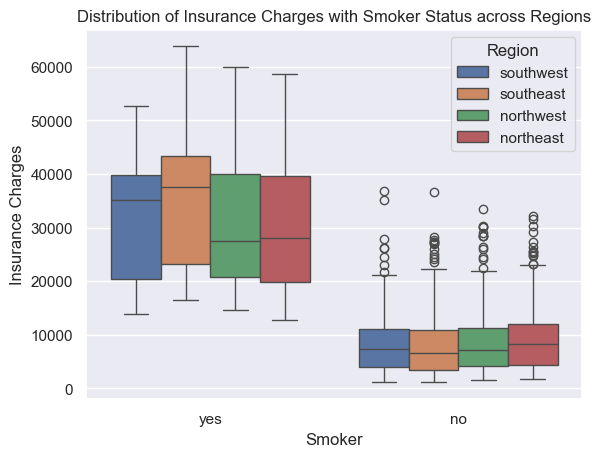

In [341]:
# Distribution of Insurance Charges with Smoker Status across Regions
sns.boxplot(data=insurance_df, x="smoker", y="charges", hue="region")
plt.legend(title="Region")
plt.xlabel("Smoker")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with Smoker Status across Regions")

Text(0.5, 1.0, 'Distribution of Insurance Charges with Body Mass Index across Regions')

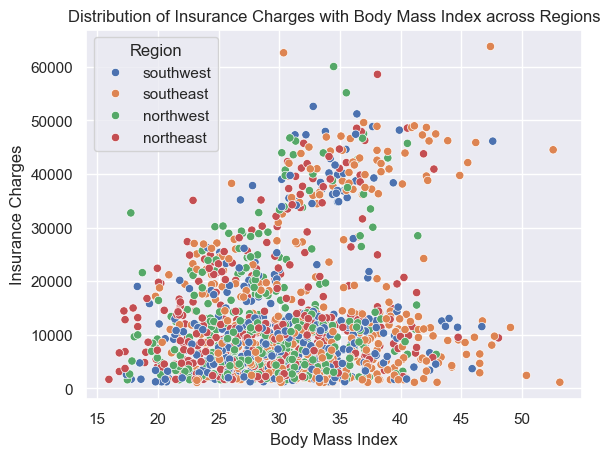

In [342]:
# Distribution of Insurance Charges with Body Mass Index across Regions
sns.scatterplot(data=insurance_df, x="bmi", y="charges", hue="region")
plt.legend(title="Region")
plt.xlabel("Body Mass Index")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with Body Mass Index across Regions")

Text(0.5, 1.0, 'Distribution of Insurance Charges with Sex Across Regions')

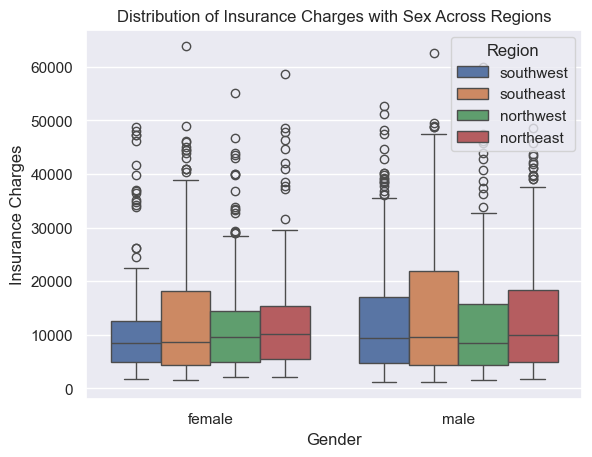

In [343]:
# Distribution of Insurance Charges with Sex Across Regions
sns.boxplot(data=insurance_df, x="sex", y="charges", hue="region")
plt.legend(title="Region")
plt.xlabel("Gender")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with Sex Across Regions")

In [344]:
# find the counts by the number of children in the dataset 
insurance_df["children"].value_counts().reset_index()

,children,count
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


Text(0.5, 1.0, 'Distribution of Insurance Charges with the Number of Children')

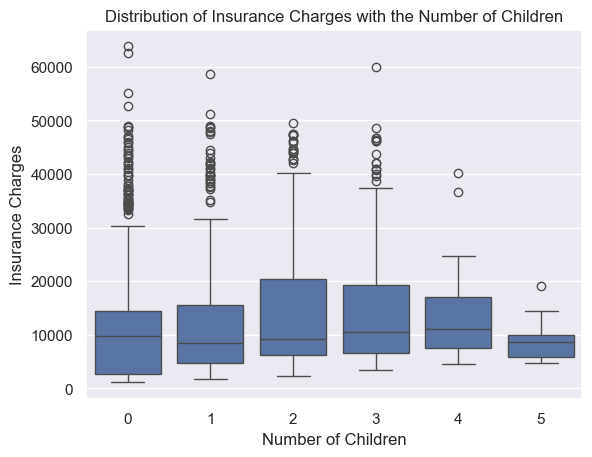

In [345]:
# Distribution of Insurance Charges with the Number of the Children
sns.boxplot(data=insurance_df, x="children", y="charges")
plt.xlabel("Number of Children")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with the Number of Children")

In [346]:
# split the dataset to train and test with a 80% - 20% ratio

np.random.seed(42)
def split_train_test(data_frame: pd.DataFrame, test_ratio: float) -> (pd.DataFrame, pd.DataFrame):
    shuffled_indices = np.random.permutation(len(data_frame))
    test_set_size = int(len(data_frame) * test_ratio)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    return data_frame.iloc[train_indices], data_frame.iloc[test_indices]


train_insurance_df, test_insurance_df = split_train_test(data_frame=insurance_df, test_ratio=0.2)

print(f"train = {len(train_insurance_df)}, test = {len(test_insurance_df)}")

train = 1071, test = 267


In [347]:
# transforming categorical columns into numeric ones 

train_insurance_df["sex"] = train_insurance_df["sex"].map({"male": 0, "female": 1})
test_insurance_df["sex"] = test_insurance_df["sex"].map({"male": 0, "female": 1})
train_insurance_df["region"] = train_insurance_df["region"].map({"southeast": 0, "northeast": 1, "southwest": 2, "northwest": 3})
test_insurance_df["region"] = test_insurance_df["region"].map({"southeast": 0, "northeast": 1, "southwest": 2, "northwest": 3})
train_insurance_df["smoker"] = train_insurance_df["smoker"].map({"yes": 1, "no": 0})
test_insurance_df["smoker"] = test_insurance_df["smoker"].map({"yes": 1, "no": 0})

In [348]:
# create the x, y components of both the training set and test set 
x_train_insurance_df = train_insurance_df.loc[:,["age", "sex", "bmi", "children", "smoker", "region"]]
y_train_insurance_df = train_insurance_df.loc[:,["charges"]]


x_test_insurance_df = test_insurance_df.loc[:,["age", "sex", "bmi", "children", "smoker", "region"]]
y_test_insurance_df = test_insurance_df.loc[:,["charges"]]

In [349]:
# now create the linear regression model 
linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train_insurance_df, y_train_insurance_df)

LinearRegression()

In [350]:
# find the predictons from the linear regression model for the test data 
linear_predictions_df = pd.DataFrame(linear_reg_model.predict(x_test_insurance_df), columns=["predicted_charges"])

In [351]:
# create the final data frame 
final_linear_predicted_df = pd.concat([x_test_insurance_df.reset_index(drop=True), y_test_insurance_df.reset_index(drop=True), linear_predictions_df], axis=1)

# reverse transform the categorical columns 
final_linear_predicted_df["sex"] = final_linear_predicted_df["sex"].map({0: "male", 1: "female"})
final_linear_predicted_df["region"] = final_linear_predicted_df["region"].map({0: "southeast", 1: "northeast", 2: "southwest", 3: "northwest"})
final_linear_predicted_df["smoker"] = final_linear_predicted_df["smoker"].map({1: "yes", 0: "no"})

# final predicted values
final_linear_predicted_df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,45,female,25.175,2,no,northeast,9095.06825,8551.732545
1,36,female,30.020,0,no,northwest,5272.17580,6963.862124
2,64,female,26.885,0,yes,northwest,29330.98315,36788.423720
3,46,male,25.745,3,no,northwest,9301.89355,9414.415369
4,19,male,31.920,0,yes,northwest,33750.29180,26870.784966
...,...,...,...,...,...,...,...,...
262,27,male,29.150,0,yes,southeast,18246.49550,28028.354663
263,63,male,35.090,0,yes,southeast,47055.53210,39221.945620
264,58,female,27.170,0,no,northwest,12222.89830,11684.046315
265,38,male,28.025,1,no,northeast,6067.12675,7255.396238


In [352]:
# Calculate RMSE for Linear regression model 
linear_mse = mean_squared_error(final_linear_predicted_df["charges"], final_linear_predicted_df["predicted_charges"])

linear_rmse = float(np.sqrt(linear_mse))

print(f"The RMSE for the Decision Tree Classifier is {linear_rmse}")

The RMSE for the Decision Tree Classifier is 5837.903316776755


In [353]:
# Create the Decision Tree Regressor Model 
decision_tree_reg_model = DecisionTreeRegressor()

decision_tree_reg_model.fit(x_train_insurance_df, y_train_insurance_df)

DecisionTreeRegressor()

In [354]:
# find out the predictions for the test data
tree_predictions_df = pd.DataFrame(decision_tree_reg_model.predict(x_test_insurance_df), columns=["predicted_charges"])

In [355]:
# create the final data frame 
final_tree_predicted_df = pd.concat([x_test_insurance_df.reset_index(drop=True), y_test_insurance_df.reset_index(drop=True), tree_predictions_df], axis=1)

# reverse transform the categorical columns 
final_tree_predicted_df["sex"] = final_tree_predicted_df["sex"].map({0: "male", 1: "female"})
final_tree_predicted_df["region"] = final_tree_predicted_df["region"].map({0: "southeast", 1: "northeast", 2: "southwest", 3: "northwest"})
final_tree_predicted_df["smoker"] = final_tree_predicted_df["smoker"].map({1: "yes", 0: "no"})

# final predicted values
final_tree_predicted_df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,45,female,25.175,2,no,northeast,9095.06825,9500.57305
1,36,female,30.020,0,no,northwest,5272.17580,4571.41305
2,64,female,26.885,0,yes,northwest,29330.98315,28950.46920
3,46,male,25.745,3,no,northwest,9301.89355,9500.57305
4,19,male,31.920,0,yes,northwest,33750.29180,33732.68670
...,...,...,...,...,...,...,...,...
262,27,male,29.150,0,yes,southeast,18246.49550,19350.36890
263,63,male,35.090,0,yes,southeast,47055.53210,46889.26120
264,58,female,27.170,0,no,northwest,12222.89830,11073.17600
265,38,male,28.025,1,no,northeast,6067.12675,5484.46730


In [356]:
# Calculate RMSE for Decision Tree Regression Model
tree_mse = mean_squared_error(final_tree_predicted_df["charges"], final_tree_predicted_df["predicted_charges"])

tree_rmse = float(np.sqrt(tree_mse))

print(f"The RMSE for the Decision Tree Classifier is {tree_rmse}") 

The RMSE for the Decision Tree Classifier is 7027.222858719389


In [357]:
# Combine the RMSE values into one data for better readability 
df_accuracy_results = pd.concat([pd.DataFrame([{"model_type": "Linear Regression", "rmse_value": linear_rmse}]), 
                      pd.DataFrame([{"model_type": "Decision Tree", "rmse_value": tree_rmse}])], axis=0)

df_accuracy_results

,model_type,rmse_value
0,Linear Regression,5837.903317
0,Decision Tree,7027.222859


Text(0.5, 1.0, 'Decision Tree Regressor - Feature Importances')

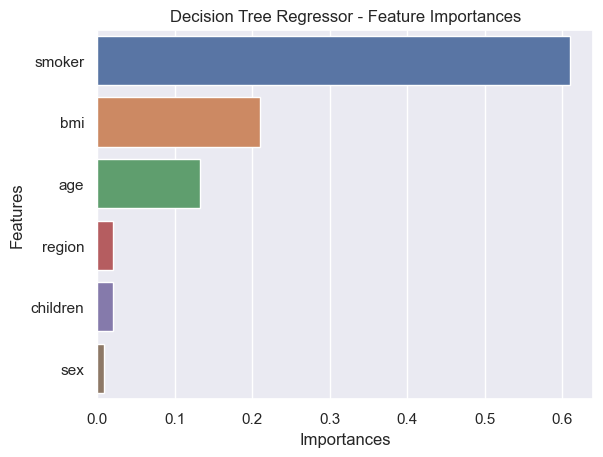

In [358]:
# Get Feature Importances for Decision Tree Regressor 


tree_importances_df = pd.DataFrame(decision_tree_reg_model.feature_importances_, columns=["importances"])

tree_features_df = pd.DataFrame(["age", "sex", "bmi", "children", "smoker", "region"], columns=["predictors"])


feature_importances_tree_df = pd.concat([tree_features_df, tree_importances_df], axis=1)

feature_importances_tree_df = feature_importances_tree_df.sort_values(["importances"], ascending=False)

sns.barplot(data=feature_importances_tree_df, 
            x="importances", 
            y="predictors", 
            hue="predictors")

plt.xlabel("Importances")
plt.ylabel("Features")
plt.title("Decision Tree Regressor - Feature Importances")

Text(0.5, 1.0, 'Linear Regression - Feature Importances')

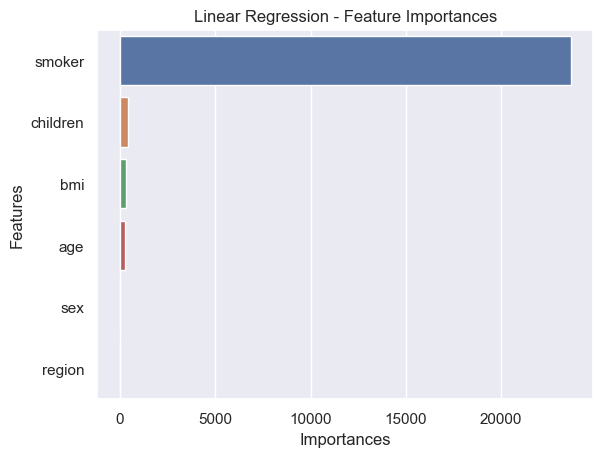

In [359]:
# Get Feature Importances for Linear Regression 

linear_coeffs = np.transpose(linear_reg_model.coef_)

features = np.transpose(np.array([["age", "sex", "bmi", "children", "smoker", "region"]]))



feature_importances_linear_df = pd.concat([pd.DataFrame(features, columns=["features"]).reset_index(drop=True),
                                           pd.DataFrame(linear_coeffs, columns=["linear_coeffs"]).reset_index(drop=True)], axis=1).sort_values(["linear_coeffs"], ascending=False)

sns.barplot(data=feature_importances_linear_df, x="linear_coeffs", y="features", hue="features")

plt.xlabel("Importances")
plt.ylabel("Features")
plt.title("Linear Regression - Feature Importances")